<font size=5> This document includes or references data provided by J.P. Morgan. </font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time

In [2]:
JPfraud_full = pd.read_csv("../data/fraud_payment_data")
JPfraud_full

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498172,2054-09-14 13:17:24,PAY-BILL-2180018,JPMC-CLIENT-2179746,ACCOUNT-2179757,USA,24701.0,CCB,BILL-COMPANY-2179895,ACCOUNT-2179896,USA,159.64,0,MAKE-PAYMENT
1498173,2054-09-15 00:57:24,QUICK-PAYMENT-2181421,JPMC-CLIENT-2181147,ACCOUNT-2181158,USA,4953.0,CCB,CLIENT-2181279,ACCOUNT-2181280,USA,120.07,0,QUICK-PAYMENT
1498174,2054-09-15 01:17:24,PAYMENT-2180021,JPMC-CLIENT-2179746,ACCOUNT-2179757,USA,34784.0,CCB,BILL-COMPANY-2180022,ACCOUNT-2180023,USA,25.32,0,MAKE-PAYMENT
1498175,2054-09-15 12:57:24,QUICK-PAYMENT-2181422,JPMC-CLIENT-2181147,ACCOUNT-2181158,USA,23822.0,CCB,CLIENT-2181279,ACCOUNT-2181280,USA,610.91,0,QUICK-PAYMENT


In [3]:
JPfraud_full[JPfraud_full.USD_amount == 0]

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
10621,2022-06-09 23:54:01,PAYMENT-18999,JPMC-CLIENT-18825,ACCOUNT-18836,USA,7738.0,CCB,BILL-COMPANY-19000,ACCOUNT-19001,SOUTH-AFRICA,0.0,0,MAKE-PAYMENT
149761,2025-06-20 02:44:20,PAYMENT-217697,JPMC-CLIENT-217580,ACCOUNT-217592,USA,24397.0,CCB,BILL-COMPANY-217698,ACCOUNT-217699,USA,0.0,0,MAKE-PAYMENT
176816,2026-02-03 19:24:24,PAYMENT-265331,JPMC-CLIENT-265235,ACCOUNT-265245,USA,30949.0,CCB,BILL-COMPANY-265332,ACCOUNT-265333,USA,0.0,0,MAKE-PAYMENT
202768,2026-08-25 00:54:27,PAYMENT-289988,JPMC-CLIENT-289739,ACCOUNT-289749,USA,30197.0,CCB,BILL-COMPANY-289989,ACCOUNT-289990,USA,0.0,0,MAKE-PAYMENT
269073,2028-01-12 02:04:36,PAYMENT-388698,JPMC-CLIENT-388507,ACCOUNT-388518,USA,12534.0,CCB,BILL-COMPANY-388699,ACCOUNT-388700,ITALY,0.0,0,MAKE-PAYMENT
316686,2029-01-18 07:24:43,PAYMENT-467720,JPMC-CLIENT-467681,ACCOUNT-467691,USA,23729.0,CCB,BILL-COMPANY-467721,ACCOUNT-467722,USA,0.0,0,MAKE-PAYMENT
448323,2031-11-01 21:05:00,PAYMENT-646524,JPMC-CLIENT-646245,ACCOUNT-646295,PALESTINE,37221.0,CCB,BILL-COMPANY-646525,ACCOUNT-646526,MALAYSIA,0.0,0,MAKE-PAYMENT
450784,2031-11-22 00:05:01,PAYMENT-664155,JPMC-CLIENT-664061,ACCOUNT-664071,USA,69.0,CCB,BILL-COMPANY-664156,ACCOUNT-664157,USA,0.0,0,MAKE-PAYMENT
495710,2032-11-10 02:05:07,PAYMENT-726669,JPMC-CLIENT-726546,ACCOUNT-726557,USA,31928.0,CCB,BILL-COMPANY-726670,ACCOUNT-726671,OMAN,0.0,0,MAKE-PAYMENT
573012,2034-08-13 06:15:18,PAYMENT-836106,JPMC-CLIENT-836009,ACCOUNT-836087,HAITI,44593.0,CCB,BILL-COMPANY-836107,ACCOUNT-836108,MOROCCO,0.0,0,MAKE-PAYMENT


In [4]:
len(JPfraud_full[JPfraud_full.USD_amount == 0])

22

In [5]:
JPfraud_full = JPfraud_full.drop(labels=['Sender_Sector','Sender_lob'],axis=1)
JPfraud_full['Time_step'] = pd.to_datetime(JPfraud_full['Time_step'],format='%Y-%m-%d %H:%M:%S')
JPfraud_full

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK
...,...,...,...,...,...,...,...,...,...,...,...
1498172,2054-09-14 13:17:24,PAY-BILL-2180018,JPMC-CLIENT-2179746,ACCOUNT-2179757,USA,BILL-COMPANY-2179895,ACCOUNT-2179896,USA,159.64,0,MAKE-PAYMENT
1498173,2054-09-15 00:57:24,QUICK-PAYMENT-2181421,JPMC-CLIENT-2181147,ACCOUNT-2181158,USA,CLIENT-2181279,ACCOUNT-2181280,USA,120.07,0,QUICK-PAYMENT
1498174,2054-09-15 01:17:24,PAYMENT-2180021,JPMC-CLIENT-2179746,ACCOUNT-2179757,USA,BILL-COMPANY-2180022,ACCOUNT-2180023,USA,25.32,0,MAKE-PAYMENT
1498175,2054-09-15 12:57:24,QUICK-PAYMENT-2181422,JPMC-CLIENT-2181147,ACCOUNT-2181158,USA,CLIENT-2181279,ACCOUNT-2181280,USA,610.91,0,QUICK-PAYMENT


In [6]:
type(JPfraud_full.Time_step.iloc[12345])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
JPfraud_full.Time_step.mean()

Timestamp('2038-06-16 16:05:19.737899520')

In [8]:
JPfraud = JPfraud_full[:500000]
JPfraud

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK
...,...,...,...,...,...,...,...,...,...,...,...
499995,2032-12-06 10:55:07,QUICK-PAYMENT-727369,CLIENT-727191,ACCOUNT-727192,USA,JPMC-CLIENT-727105,ACCOUNT-727116,USA,521.89,0,QUICK-PAYMENT
499996,2032-12-06 10:55:07,PAY-CHECK-721411,JPMC-CLIENT-721145,ACCOUNT-721159,USA,CLIENT-721146,ACCOUNT-721157,USA,148.32,0,PAY-CHECK
499997,2032-12-06 11:05:07,QUICK-PAYMENT-727371,JPMC-CLIENT-727105,ACCOUNT-727115,USA,CLIENT-727191,ACCOUNT-727192,USA,461.52,0,QUICK-PAYMENT
499998,2032-12-06 11:05:07,MOVE-FUNDS-721413,JPMC-CLIENT-721145,ACCOUNT-721175,USA,JPMC-CLIENT-721148,ACCOUNT-721154,ANTARCTICA,866.33,0,MOVE-FUNDS


In [9]:
JPfraud.Transaction_Type.value_counts()

Transaction_Type
MAKE-PAYMENT     186450
QUICK-PAYMENT     73058
MOVE-FUNDS        60142
DEPOSIT-CASH      36464
DEPOSIT-CHECK     36357
PAY-CHECK         36041
EXCHANGE          35943
WITHDRAWAL        35545
Name: count, dtype: int64

In [10]:
JPfraud.Label.value_counts(normalize=True)

Label
0    0.979598
1    0.020402
Name: proportion, dtype: float64

In [11]:
print(JPfraud.Sender_Id.value_counts())
print()
print(JPfraud.Bene_Id.value_counts())

Sender_Id
JPMC-CLIENT-303611     155
JPMC-CLIENT-360470     154
JPMC-CLIENT-456840     152
JPMC-CLIENT-343036     152
JPMC-CLIENT-437630     152
                      ... 
BILL-COMPANY-174247      1
JPMC-COMPANY-451923      1
COMPANY-181929           1
BILL-COMPANY-176535      1
BILL-COMPANY-724797      1
Name: count, Length: 19594, dtype: int64

Bene_Id
JPMC-CLIENT-599198     79
JPMC-CLIENT-730151     79
JPMC-CLIENT-198756     78
JPMC-CLIENT-507183     77
JPMC-CLIENT-108724     77
                       ..
BILL-COMPANY-331911     1
BILL-COMPANY-336984     1
BILL-COMPANY-336021     1
BILL-COMPANY-334277     1
BILL-COMPANY-723721     1
Name: count, Length: 93177, dtype: int64


In [12]:
# Do unique accounts have multiple Sender or Beneficiary countries?
sender_pairs = JPfraud[['Sender_Id','Sender_Country']].dropna().drop_duplicates()
sender_pairs.sort_values(by='Sender_Id',inplace=True,ascending=True)
sender_pairs = sender_pairs.reset_index(drop=True)
sender_pairs

,Sender_Id,Sender_Country
0,BILL-COMPANY-100003,USA
1,BILL-COMPANY-100082,SAINT-LUCIA
2,BILL-COMPANY-100311,HAITI
3,BILL-COMPANY-10046,USA
4,BILL-COMPANY-100490,USA
...,...,...
20798,JPMC-COMPANY-98189,GHANA
20799,JPMC-COMPANY-98470,MALAYSIA
20800,JPMC-COMPANY-98472,GERMANY
20801,JPMC-COMPANY-99062,GERMANY


In [13]:
sender_pairs[sender_pairs.duplicated(subset='Sender_Id',keep=False)]

,Sender_Id,Sender_Country
13914,JPMC-CLIENT-100165,USA
13915,JPMC-CLIENT-100165,KENYA
13921,JPMC-CLIENT-101582,USA
13922,JPMC-CLIENT-101582,SLOVENIA
13937,JPMC-CLIENT-103239,TUVALU
...,...,...
18898,JPMC-CLIENT-96995,USA
18901,JPMC-CLIENT-97305,USA
18902,JPMC-CLIENT-97305,AUSTRIA
18919,JPMC-CLIENT-99625,USA


In [14]:
len(JPfraud.Transaction_Id.unique())

500000

<font size=8>Checking for which transactions have NaNs </font>

In [16]:
JPfraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time_step         500000 non-null  datetime64[ns]
 1   Transaction_Id    500000 non-null  object        
 2   Sender_Id         427179 non-null  object        
 3   Sender_Account    427179 non-null  object        
 4   Sender_Country    427179 non-null  object        
 5   Bene_Id           428512 non-null  object        
 6   Bene_Account      428512 non-null  object        
 7   Bene_Country      428512 non-null  object        
 8   USD_amount        500000 non-null  float64       
 9   Label             500000 non-null  int64         
 10  Transaction_Type  500000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 42.0+ MB


In [17]:
JPfraud.isna().sum()

Time_step               0
Transaction_Id          0
Sender_Id           72821
Sender_Account      72821
Sender_Country      72821
Bene_Id             71488
Bene_Account        71488
Bene_Country        71488
USD_amount              0
Label                   0
Transaction_Type        0
dtype: int64

In [18]:
# Indicating only depositing transactions have NaN's for Sender_Id
JPfraud[((JPfraud.Sender_Id.isnull()) & ~((JPfraud.Transaction_Type == 'DEPOSIT-CASH') |
                                             (JPfraud.Transaction_Type == 'DEPOSIT-CHECK')))]

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type


In [19]:
print('Number of DEPOSIT-CASH, DEPOSIT-CHECK transactions', len(JPfraud[((JPfraud.Transaction_Type == 'DEPOSIT-CASH') |
                                             (JPfraud.Transaction_Type == 'DEPOSIT-CHECK'))]))
print('Number of NaNs in Sender_Id for DEPOSIT-CASH, DEPOSIT-CHECK transactions', len(JPfraud[((JPfraud.Sender_Id.isna()) & ((JPfraud.Transaction_Type == 'DEPOSIT-CASH') |
                                             (JPfraud.Transaction_Type == 'DEPOSIT-CHECK')))]))

Number of DEPOSIT-CASH, DEPOSIT-CHECK transactions 72821
Number of NaNs in Sender_Id for DEPOSIT-CASH, DEPOSIT-CHECK transactions 72821


In [20]:
print('Number of WITHDRAWAL, EXCHANGE transactions', len(JPfraud[((JPfraud.Transaction_Type == 'WITHDRAWAL') |
                                             (JPfraud.Transaction_Type == 'EXCHANGE'))]))
print('Number of nulls in Bene_Id for WITHDRAWAL, EXCHANGE transactions', len(JPfraud[((JPfraud.Bene_Id.isnull()) &
                                                                                            ((JPfraud.Transaction_Type == 'WITHDRAWAL') |
                                                                                             (JPfraud.Transaction_Type == 'EXCHANGE')))]))

Number of WITHDRAWAL, EXCHANGE transactions 71488
Number of nulls in Bene_Id for WITHDRAWAL, EXCHANGE transactions 71488


<font size=4> **Conclusion:** *There's not any "missing data." Deposits (DEPOSIT-CASH, DEPOSIT-CHECK) only have Beneficiary account identifications, and withdrawals/exchanges only have Sender account identifications.*</font>

<font size=6> Comparing transaction amount and number of fraudulent transactions detected </font>

In [23]:
trans_types = JPfraud.Transaction_Type.unique()
fraud_number = np.zeros(len(trans_types))

for i, trans in enumerate(trans_types):
    fraud_number[i] = JPfraud.loc[JPfraud.Transaction_Type == trans].Label.sum()

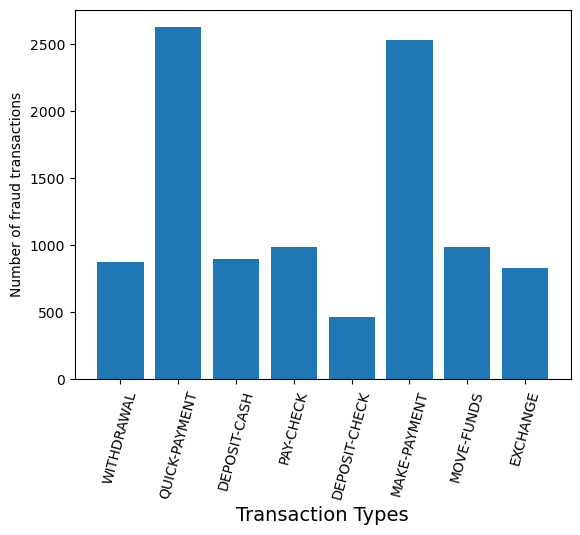

In [24]:
plt.figure()

plt.bar(trans_types, fraud_number)
plt.xlabel('Transaction Types',fontsize=14)
plt.ylabel('Number of fraud transactions',fontsize=10)
plt.xticks(np.arange(len(trans_types)),trans_types,rotation=75)

plt.show()

In [25]:
print('Max USD amount:', JPfraud.USD_amount.max())
print('Min USD amount:', JPfraud.USD_amount.min())

Max USD amount: 19927.99
Min USD amount: 0.0


In [26]:
JPfraud.loc[JPfraud.Label == 1].USD_amount.describe()

count    10201.000000
mean       819.519502
std       1907.635796
min        100.000000
25%        255.140000
50%        513.240000
75%        776.110000
max      19927.990000
Name: USD_amount, dtype: float64

In [27]:
JPfraud.loc[JPfraud.Label == 0].USD_amount.describe()

count    489799.000000
mean        507.129661
std         462.088705
min           0.000000
25%         135.860000
50%         402.010000
75%         733.340000
max       19838.380000
Name: USD_amount, dtype: float64

In [28]:
bin_labels = []
for i in np.arange(40):
    bin_labels.append(str(i*500) + '-' + str(i*500 + 500))

print(bin_labels)
print()
print(len(bin_labels))

['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000-5500', '5500-6000', '6000-6500', '6500-7000', '7000-7500', '7500-8000', '8000-8500', '8500-9000', '9000-9500', '9500-10000', '10000-10500', '10500-11000', '11000-11500', '11500-12000', '12000-12500', '12500-13000', '13000-13500', '13500-14000', '14000-14500', '14500-15000', '15000-15500', '15500-16000', '16000-16500', '16500-17000', '17000-17500', '17500-18000', '18000-18500', '18500-19000', '19000-19500', '19500-20000']

40


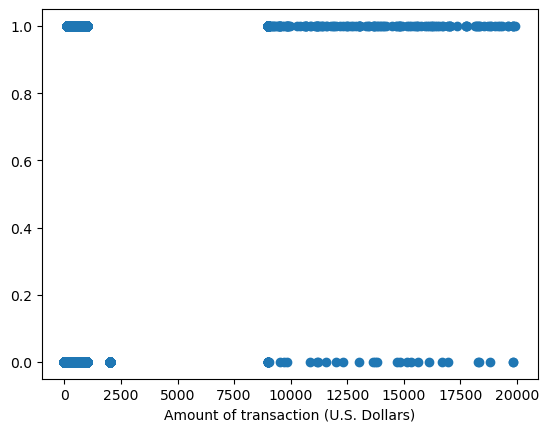

In [29]:
plt.figure()
plt.scatter(JPfraud.USD_amount,JPfraud.Label)
plt.xlabel('Amount of transaction (U.S. Dollars)')
#plt.ylabel('Not Fraud/Fraud')
plt.show()

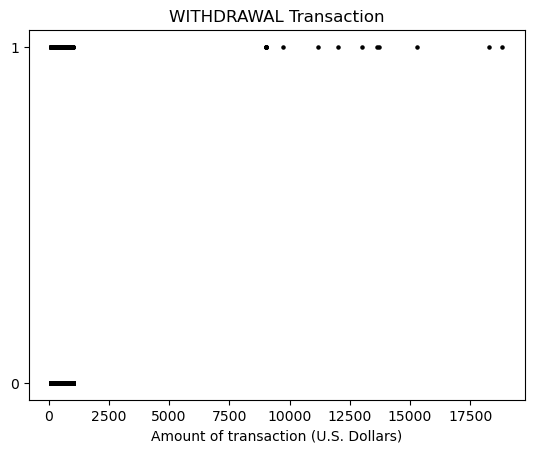

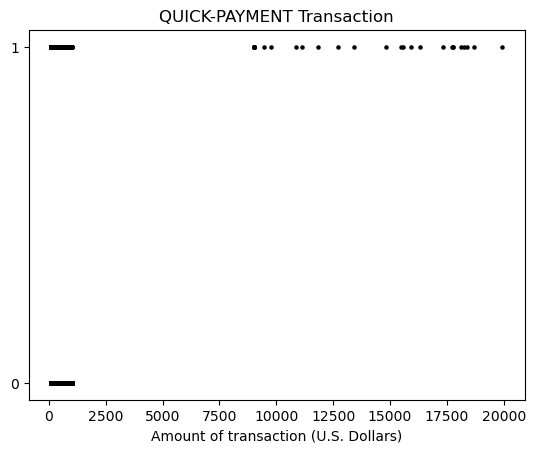

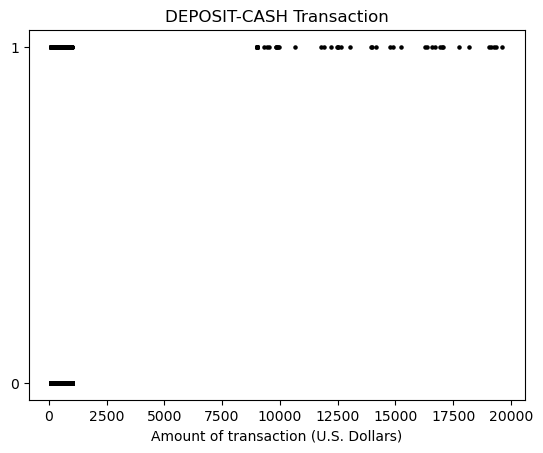

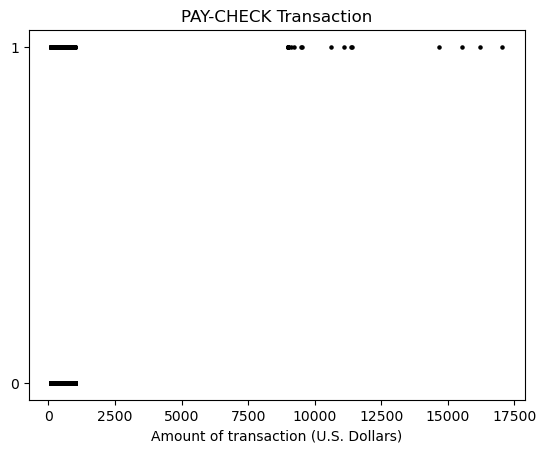

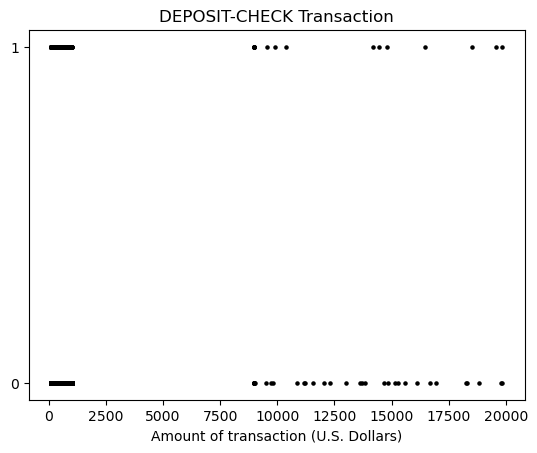

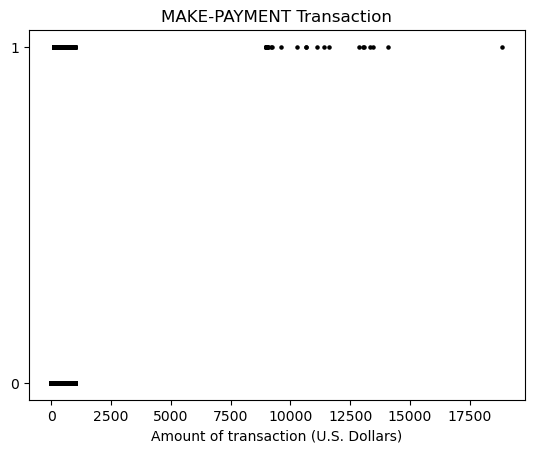

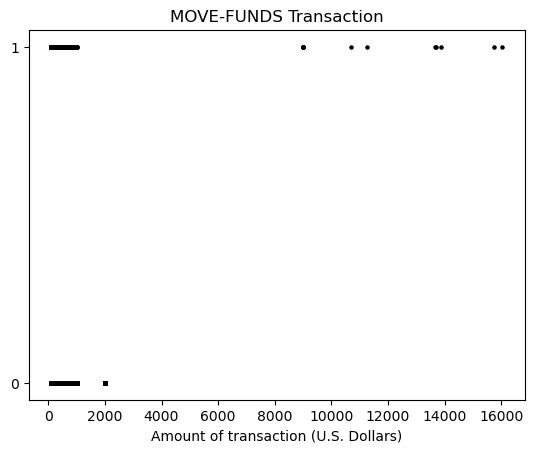

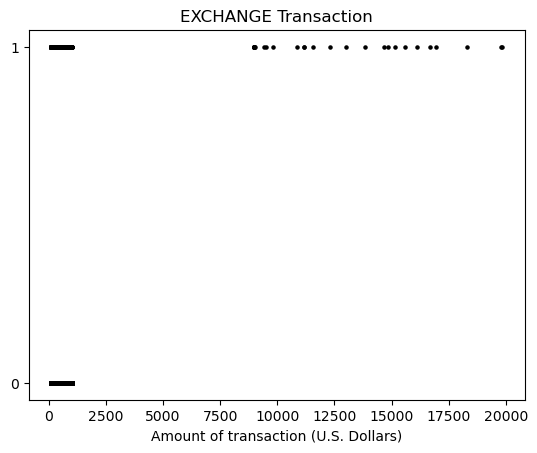

In [30]:
trans_type = JPfraud.Transaction_Type.unique()

for trans in trans_type:
    plt.figure()
    plt.scatter(JPfraud.loc[JPfraud.Transaction_Type == trans].USD_amount,JPfraud.loc[JPfraud.Transaction_Type == trans].Label,s=5,color='black',marker='o')
    #plt.ylabel('Not Fraud/Fraud')
    plt.xlabel('Amount of transaction (U.S. Dollars)')
    plt.yticks([0,1])
    plt.title(trans + ' Transaction')
    plt.show()

<font size=6> Distribution of time </font>

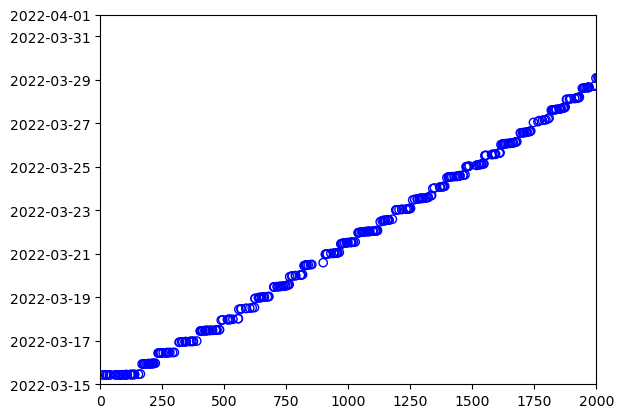

In [32]:
plt.figure()
JPfraud_timeplot = JPfraud.sample(100000,random_state=12345)
plt.scatter(JPfraud_timeplot.index,JPfraud_timeplot.Time_step,marker='o',facecolor='None',edgecolor='blue')
plt.xlim([0,2000])
plt.ylim([dt.datetime(2022,3,15,0,0,0),dt.datetime(2022,4,1,0,0,0)])
plt.show()

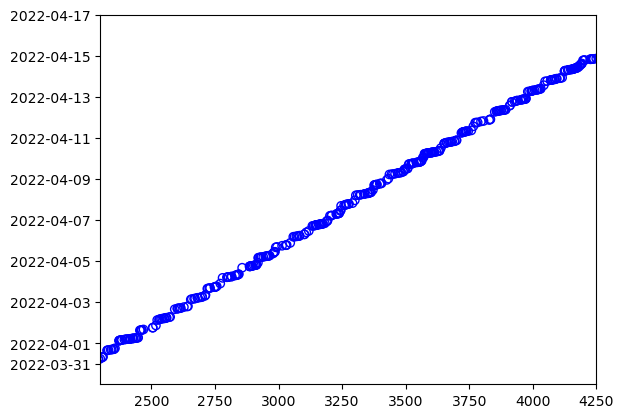

In [33]:
plt.figure()
JPfraud_timeplot2 = JPfraud.sample(100000,random_state=12345)
plt.scatter(JPfraud_timeplot2.index,JPfraud_timeplot2.Time_step,marker='o',facecolor='None',edgecolor='blue')
plt.xlim([2300,4250])
plt.ylim([dt.datetime(2022,3,30,0,0,0),dt.datetime(2022,4,17,0,0,0)])
plt.show()

In [34]:
JPfraud.Time_step.value_counts().head(40)

Time_step
2023-08-28 13:04:09    100
2027-10-12 02:14:35    100
2023-03-04 07:34:06     99
2030-08-11 02:14:53     99
2024-08-09 12:34:15     99
2024-10-09 01:34:16     99
2029-01-13 17:34:43     99
2027-08-15 12:14:34     98
2029-05-09 22:14:45     98
2031-11-09 18:55:01     98
2032-10-22 07:15:07     98
2022-11-04 17:04:04     98
2028-11-17 15:24:42     98
2023-06-29 11:54:08     97
2027-12-10 14:34:36     97
2028-02-06 16:24:37     97
2027-02-27 15:54:31     97
2023-04-29 11:04:07     97
2028-05-31 21:24:39     97
2031-05-24 00:54:58     97
2029-12-27 04:54:49     96
2031-07-20 03:04:59     96
2027-04-24 19:24:32     96
2030-04-19 09:44:51     96
2024-02-16 18:14:12     96
2030-02-21 07:24:50     96
2032-03-04 10:45:03     96
2030-06-14 00:24:52     96
2026-01-18 14:34:24     96
2031-09-12 18:05:00     96
2028-04-04 19:14:38     96
2023-12-21 16:04:11     96
2029-07-07 11:54:46     96
2029-09-02 14:04:47     96
2026-05-13 07:44:26     96
2026-07-09 21:44:27     96
2026-12-31 02:14:3

<font size=6> Behavioral Features </font>

**Goal:** Identify patterns from a client’s transaction history.

Transaction Amount Patterns:
<ul><li> Average transaction amount per client </li>
<li> Deviations from typical amounts (outliers) </li>
</ul>

Transaction Timing Patterns:
<ul>
 <li>  Unusual activity by local time (time zone outliers for the client) </li>
 <li> Time between consecutive transactions, </li>
 <li> Recipient Patterns: Number of unique recipients per sender (potential pattern for laundering) </li>
</ul>

<font size=6> Attempting rolling day stats</font>

In [37]:
rolling_period = '180D'
min_obs = 3

In [38]:
pd.options.mode.chained_assignment = None

## Expanding averages ##
# out_avg: expanding average, i.e. average up till time of transaction, of sender's transactions
#JPfraud['out_avg'] = JPfraud.set_index('Time_step').groupby('Sender_Account',sort=False)['USD_amount'].transform(
#    lambda x: x.expanding(method='single').mean().round(2)).reset_index(level=0,drop=True)

# in_avg: expanding average, i.e. average up till time of transaction, of beneficiary's transactions
#JPfraud['in_avg'] = JPfraud.set_index('Time_step').groupby('Bene_Account',sort=False)['USD_amount'].transform(
#    lambda x: x.expanding(method='single').mean().round(2)).reset_index(level=0,drop=True)

## Rolling averages

# out_avg: rolling average of sender's transactions
#JPfraud['out_avg'] = JPfraud.set_index('Time_step').groupby(
#                        'Sender_Account',sort=False)['USD_amount'].transform(
#                        lambda x: x.rolling(rolling_period).mean().round(2)).reset_index(level=0,drop=True)

# in_avg: rolling average of beneficiary's transactions
#JPfraud['in_avg'] = JPfraud.set_index('Time_step').groupby(
#                        'Bene_Account',sort=False)['USD_amount'].transform(
#                        lambda x: x.rolling(rolling_period).mean().round(2)).reset_index(level=0,drop=True)

# rolling_sender_quant##: rolling quantiles of 15% and 85% for sender's transactions
JPfraud['rolling_sender_trans_min'] = JPfraud.set_index('Time_step').groupby(
                                        'Sender_Account',sort=False)['USD_amount'].transform(
                                        lambda x: x.rolling(rolling_period,min_periods=min_obs).quantile(q=0.15).round(2)).reset_index(level=0,drop=True)
JPfraud['rolling_sender_trans_max'] = JPfraud.set_index('Time_step').groupby(
                                        'Sender_Account',sort=False)['USD_amount'].transform(
                                        lambda x: x.rolling(rolling_period,min_periods=min_obs).quantile(q=0.85).round(2)).reset_index(level=0,drop=True)

# rolling_bene_quant##: rolling quantiles of 15% and 85% beneficiary's transactions
JPfraud['rolling_bene_trans_min'] = JPfraud.set_index('Time_step').groupby(
                                    'Bene_Account',sort=False)['USD_amount'].transform(
                                    lambda x: x.rolling(rolling_period,min_periods=min_obs).quantile(q=0.15).round(2)).reset_index(level=0,drop=True)
JPfraud['rolling_bene_trans_max'] = JPfraud.set_index('Time_step').groupby(
                                    'Bene_Account',sort=False)['USD_amount'].transform(
                                    lambda x: x.rolling(rolling_period,min_periods=min_obs).quantile(q=0.85).round(2)).reset_index(level=0,drop=True)
#JPfraud

In [39]:
# Classifiers on whether in or outside quantile ranges
JPfraud = JPfraud.assign(out_sender_trans_range = lambda x: ((x.USD_amount < x.rolling_sender_trans_min) | (x.USD_amount > x.rolling_sender_trans_max))*1)
JPfraud = JPfraud.assign(out_bene_trans_range = lambda x: ((x.USD_amount < x.rolling_bene_trans_min) | (x.USD_amount > x.rolling_bene_trans_max))*1)
#JPfraud

In [40]:
# Time between transactions for unique accounts
JPfraud['sender_time_btwn'] = JPfraud.groupby('Sender_Account')['Time_step'].diff().mask(JPfraud.groupby('Sender_Account')['Time_step'].cumcount().eq(0), dt.timedelta(0))
JPfraud['bene_time_btwn'] = JPfraud.groupby('Bene_Account')['Time_step'].diff().mask(JPfraud.groupby('Bene_Account')['Time_step'].cumcount().eq(0), dt.timedelta(0))

JPfraud

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type,rolling_sender_trans_min,rolling_sender_trans_max,rolling_bene_trans_min,rolling_bene_trans_max,out_sender_trans_range,out_bene_trans_range,sender_time_btwn,bene_time_btwn
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,NaN,NaN,NaN,558.43,0,WITHDRAWAL,NaN,NaN,NaN,NaN,0,0,0 days 00:00:00,NaT
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT,NaN,NaN,NaN,NaN,0,0,0 days 00:00:00,0 days 00:00:00
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH,NaN,NaN,NaN,NaN,0,0,NaT,0 days 00:00:00
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK,NaN,NaN,NaN,NaN,0,0,0 days 00:00:00,0 days 00:00:00
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK,NaN,NaN,NaN,NaN,0,0,NaT,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2032-12-06 10:55:07,QUICK-PAYMENT-727369,CLIENT-727191,ACCOUNT-727192,USA,JPMC-CLIENT-727105,ACCOUNT-727116,USA,521.89,0,QUICK-PAYMENT,297.64,677.87,185.40,864.60,0,0,0 days 00:20:00,0 days 13:00:00
499996,2032-12-06 10:55:07,PAY-CHECK-721411,JPMC-CLIENT-721145,ACCOUNT-721159,USA,CLIENT-721146,ACCOUNT-721157,USA,148.32,0,PAY-CHECK,149.52,780.57,106.01,675.68,1,0,0 days 00:10:00,1 days 00:10:00
499997,2032-12-06 11:05:07,QUICK-PAYMENT-727371,JPMC-CLIENT-727105,ACCOUNT-727115,USA,CLIENT-727191,ACCOUNT-727192,USA,461.52,0,QUICK-PAYMENT,62.64,577.46,265.01,877.15,0,0,0 days 00:40:00,0 days 00:50:00
499998,2032-12-06 11:05:07,MOVE-FUNDS-721413,JPMC-CLIENT-721145,ACCOUNT-721175,USA,JPMC-CLIENT-721148,ACCOUNT-721154,ANTARCTICA,866.33,0,MOVE-FUNDS,25.58,800.60,289.88,888.29,1,0,1 days 00:20:00,4 days 01:30:00


In [41]:
type(JPfraud.sender_time_btwn[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [42]:
pd.options.mode.chained_assignment = None

# Rolling 90-day quantiles (15%, 85%) for times between consecutive transactions
JPfraud['rolling_sender_time_diff_min'] = JPfraud.set_index('Time_step').groupby(
                                    'Sender_Account',sort=False)['sender_time_btwn'].transform(
                                    lambda x: x.dt.total_seconds().rolling(rolling_period,min_periods=min_obs).quantile(q=0.1)).reset_index(level=0,drop=True)
JPfraud['rolling_sender_time_diff_max'] = JPfraud.set_index('Time_step').groupby(
                                    'Sender_Account',sort=False)['sender_time_btwn'].transform(
                                    lambda x: x.dt.total_seconds().rolling(rolling_period,min_periods=min_obs).quantile(q=0.9)).reset_index(level=0,drop=True)
JPfraud['rolling_bene_time_diff_min'] = JPfraud.set_index('Time_step').groupby(
                                    'Bene_Account',sort=False)['bene_time_btwn'].transform(
                                    lambda x: x.dt.total_seconds().rolling(rolling_period,min_periods=min_obs).quantile(q=0.1)).reset_index(level=0,drop=True)
JPfraud['rolling_bene_time_diff_max'] = JPfraud.set_index('Time_step').groupby(
                                    'Bene_Account',sort=False)['bene_time_btwn'].transform(
                                    lambda x: x.dt.total_seconds().rolling(rolling_period,min_periods=min_obs).quantile(q=0.9)).reset_index(level=0,drop=True)

# Classifying whether time between consecutive transaction is outside of range
JPfraud = JPfraud.assign(out_sender_time_diff_range = lambda x: (
            (x.sender_time_btwn.dt.total_seconds() < x.rolling_sender_time_diff_min) | (x.sender_time_btwn.dt.total_seconds() > x.rolling_sender_time_diff_max))*1)
JPfraud = JPfraud.assign(out_bene_time_diff_range = lambda x: (
            (x.bene_time_btwn.dt.total_seconds() < x.rolling_bene_time_diff_min) | (x.bene_time_btwn.dt.total_seconds() > x.rolling_bene_time_diff_max))*1)

JPfraud

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,...,out_sender_trans_range,out_bene_trans_range,sender_time_btwn,bene_time_btwn,rolling_sender_time_diff_min,rolling_sender_time_diff_max,rolling_bene_time_diff_min,rolling_bene_time_diff_max,out_sender_time_diff_range,out_bene_time_diff_range
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,NaN,NaN,NaN,558.43,0,...,0,0,0 days 00:00:00,NaT,NaN,NaN,NaN,NaN,0,0
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,...,0,0,0 days 00:00:00,0 days 00:00:00,NaN,NaN,NaN,NaN,0,0
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,...,0,0,NaT,0 days 00:00:00,NaN,NaN,NaN,NaN,0,0
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,...,0,0,0 days 00:00:00,0 days 00:00:00,NaN,NaN,NaN,NaN,0,0
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,...,0,0,NaT,0 days 00:00:00,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2032-12-06 10:55:07,QUICK-PAYMENT-727369,CLIENT-727191,ACCOUNT-727192,USA,JPMC-CLIENT-727105,ACCOUNT-727116,USA,521.89,0,...,0,0,0 days 00:20:00,0 days 13:00:00,540.0,448020.0,1200.0,368400.0,0,0
499996,2032-12-06 10:55:07,PAY-CHECK-721411,JPMC-CLIENT-721145,ACCOUNT-721159,USA,CLIENT-721146,ACCOUNT-721157,USA,148.32,0,...,1,0,0 days 00:10:00,1 days 00:10:00,600.0,303960.0,600.0,516600.0,0,0
499997,2032-12-06 11:05:07,QUICK-PAYMENT-727371,JPMC-CLIENT-727105,ACCOUNT-727115,USA,CLIENT-727191,ACCOUNT-727192,USA,461.52,0,...,0,0,0 days 00:40:00,0 days 00:50:00,600.0,247620.0,600.0,393960.0,0,0
499998,2032-12-06 11:05:07,MOVE-FUNDS-721413,JPMC-CLIENT-721145,ACCOUNT-721175,USA,JPMC-CLIENT-721148,ACCOUNT-721154,ANTARCTICA,866.33,0,...,1,0,1 days 00:20:00,4 days 01:30:00,600.0,174000.0,34680.0,455640.0,0,0


In [43]:
# Testing that new features are computing correctly
JPfraud[JPfraud.Sender_Account == 'ACCOUNT-9825']

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,...,out_sender_trans_range,out_bene_trans_range,sender_time_btwn,bene_time_btwn,rolling_sender_time_diff_min,rolling_sender_time_diff_max,rolling_bene_time_diff_min,rolling_bene_time_diff_max,out_sender_time_diff_range,out_bene_time_diff_range
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,...,0,0,0 days 00:00:00,0 days 00:00:00,NaN,NaN,NaN,NaN,0,0
137,2022-03-15 10:54:00,PAY-BILL-9836,JPMC-CLIENT-9812,ACCOUNT-9825,USA,COMPANY-9815,ACCOUNT-9821,USA,393.89,0,...,0,0,0 days 00:30:00,0 days 00:00:00,NaN,NaN,NaN,NaN,0,0
365,2022-03-16 23:24:00,CASH-CHECK-9843,JPMC-CLIENT-9812,ACCOUNT-9825,USA,NaN,NaN,NaN,207.50,0,...,1,0,1 days 12:30:00,NaT,360.0,105480.0,NaN,NaN,1,0
442,2022-03-17 11:34:00,QUICK-PAYMENT-9842,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,100.02,0,...,1,1,0 days 12:10:00,1 days 12:10:00,540.0,105120.0,9360.0,113520.0,0,1
517,2022-03-17 23:34:00,WITHDRAWAL-9845,JPMC-CLIENT-9812,ACCOUNT-9825,USA,NaN,NaN,NaN,685.63,0,...,0,0,0 days 12:00:00,NaT,720.0,96360.0,NaN,NaN,0,0
525,2022-03-17 23:44:00,PAY-BILL-9846,JPMC-CLIENT-9812,ACCOUNT-9825,USA,COMPANY-9815,ACCOUNT-9821,USA,854.45,0,...,0,0,0 days 00:10:00,2 days 12:50:00,300.0,87600.0,NaN,NaN,0,0
753,2022-03-19 13:14:00,QUICK-PAYMENT-9865,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,930.23,0,...,0,0,1 days 13:30:00,0 days 00:10:00,360.0,132840.0,240.0,159000.0,1,0
755,2022-03-19 13:24:00,EXCHANGE-9866,JPMC-CLIENT-9812,ACCOUNT-9825,USA,NaN,NaN,NaN,100.26,0,...,1,0,0 days 00:10:00,NaT,420.0,132480.0,NaN,NaN,0,0
759,2022-03-19 13:54:00,MOVE-FUNDS-9869,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-COMPANY-9819,ACCOUNT-9830,LIBERIA,232.31,0,...,0,0,0 days 00:30:00,0 days 00:00:00,480.0,132120.0,NaN,NaN,0,0
760,2022-03-19 14:04:00,EXCHANGE-9870,JPMC-CLIENT-9812,ACCOUNT-9825,USA,NaN,NaN,NaN,204.88,0,...,0,0,0 days 00:10:00,NaT,540.0,131760.0,NaN,NaN,0,0


In [44]:
JPfraud[JPfraud.Bene_Account == 'ACCOUNT-10041'].head(25)

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,...,out_sender_trans_range,out_bene_trans_range,sender_time_btwn,bene_time_btwn,rolling_sender_time_diff_min,rolling_sender_time_diff_max,rolling_bene_time_diff_min,rolling_bene_time_diff_max,out_sender_time_diff_range,out_bene_time_diff_range
4789,2022-04-19 02:44:00,PAYMENT-10039,JPMC-CLIENT-9812,ACCOUNT-9825,USA,BILL-COMPANY-10040,ACCOUNT-10041,USA,44.13,0,...,1,0,1 days 12:40:00,0 days,600.0,290280.0,NaN,NaN,0,0


<font size=5> Issues/Questions:</font>
<ol>
    <li> For a new client, first few transactions will likely be outside of quartile ranges.
         Maybe do not have quantile ranges until after first 90, 180 etc days? </li>
    <li> Treat out_range classifiers differently for NaN's? </li>
    <li> </li>
</ol>

In [46]:
JPfraud.sender_time_btwn.describe()

count                       427179
mean     1 days 08:50:06.241879867
std      2 days 02:34:58.447559040
min                0 days 00:00:00
25%                0 days 00:30:00
50%                0 days 12:10:00
75%                1 days 12:50:00
max               52 days 13:10:00
Name: sender_time_btwn, dtype: object

In [47]:
# Number of non-fraud, sender transactions vs time between transactions, hourly distribution
JPfraud[JPfraud.Label == 0].set_index('sender_time_btwn').resample('1h').Label.count()

sender_time_btwn
0 days 00:00:00     184683
0 days 01:00:00        860
0 days 02:00:00          2
0 days 03:00:00          0
0 days 04:00:00          0
                     ...  
52 days 09:00:00         0
52 days 10:00:00         0
52 days 11:00:00         0
52 days 12:00:00         0
52 days 13:00:00         1
Freq: H, Name: Label, Length: 1262, dtype: int64

In [48]:
# Number of fraud, sender transactions vs time between transactions, hourly distribution
JPfraud[JPfraud.Label == 1].set_index('sender_time_btwn').resample('1h').Label.count().head(40)

sender_time_btwn
0 days 00:00:00    4168
0 days 01:00:00      66
0 days 02:00:00       1
0 days 03:00:00       0
0 days 04:00:00       0
0 days 05:00:00       0
0 days 06:00:00       0
0 days 07:00:00       0
0 days 08:00:00       0
0 days 09:00:00       0
0 days 10:00:00       0
0 days 11:00:00       0
0 days 12:00:00    2568
0 days 13:00:00      93
0 days 14:00:00       2
0 days 15:00:00       0
0 days 16:00:00       0
0 days 17:00:00       0
0 days 18:00:00       0
0 days 19:00:00       0
0 days 20:00:00       0
0 days 21:00:00       0
0 days 22:00:00       0
0 days 23:00:00       5
1 days 00:00:00    1050
1 days 01:00:00     113
1 days 02:00:00       4
1 days 03:00:00       0
1 days 04:00:00       0
1 days 05:00:00       0
1 days 06:00:00       0
1 days 07:00:00       0
1 days 08:00:00       0
1 days 09:00:00       0
1 days 10:00:00       0
1 days 11:00:00       3
1 days 12:00:00     479
1 days 13:00:00     119
1 days 14:00:00       3
1 days 15:00:00       0
Freq: H, Name: Label, d

In [49]:
# Number of fraud, sender transactions vs time between transactions, 5 minute-distribution
JPfraud[JPfraud.Label == 1].set_index('sender_time_btwn').resample('5min').Label.sum().head(25)

# Note: shows data generated only on 10-minute increments

sender_time_btwn
0 days 00:00:00       0
0 days 00:05:00       0
0 days 00:10:00    2703
0 days 00:15:00       0
0 days 00:20:00     814
0 days 00:25:00       0
0 days 00:30:00     406
0 days 00:35:00       0
0 days 00:40:00     167
0 days 00:45:00       0
0 days 00:50:00      78
0 days 00:55:00       0
0 days 01:00:00      35
0 days 01:05:00       0
0 days 01:10:00      17
0 days 01:15:00       0
0 days 01:20:00       7
0 days 01:25:00       0
0 days 01:30:00       5
0 days 01:35:00       0
0 days 01:40:00       1
0 days 01:45:00       0
0 days 01:50:00       1
0 days 01:55:00       0
0 days 02:00:00       1
Freq: 5T, Name: Label, dtype: int64

In [50]:
# Number of sender fraudulent transactions within 24 hours (inclusive) of a transaction
print('Number of sender frauds within first hour after transaction: ', JPfraud[JPfraud.sender_time_btwn <= dt.timedelta(hours=1)].Label.sum())
print('Number of sender frauds within 13 hours after transaction: ', JPfraud[JPfraud.sender_time_btwn <= dt.timedelta(hours=13)].Label.sum())
print('Number of sender frauds over 13 hours after transaction: ', JPfraud[JPfraud.sender_time_btwn > dt.timedelta(hours=13)].Label.sum())
print('Number of sender fraud committed exactly 12 hours after:', JPfraud[JPfraud.sender_time_btwn == dt.timedelta(hours=12)].Label.sum())

Number of sender frauds within first hour after transaction:  2847
Number of sender frauds within 13 hours after transaction:  5483
Number of sender frauds over 13 hours after transaction:  3362
Number of sender fraud committed exactly 12 hours after: 446


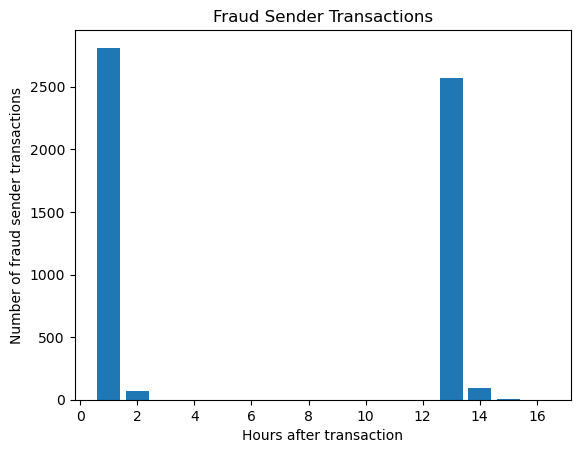

In [51]:
# Plotting distribution of sender fraud counts in hours after transaction
trans_btwn_counts = np.zeros(16)

for i in np.arange(16):
    trans_btwn_counts[i] = JPfraud[((JPfraud.sender_time_btwn >= dt.timedelta(hours=float(i))) &
                                    (JPfraud.sender_time_btwn < dt.timedelta(hours=float(i+1))))].Label.sum()

plt.figure()
plt.bar(np.linspace(1,16,16), trans_btwn_counts)
plt.xlabel('Hours after transaction')
plt.ylabel('Number of fraud sender transactions')
plt.title('Fraud Sender Transactions')
plt.savefig('sender_hrs_after_fraud.png')
plt.show()


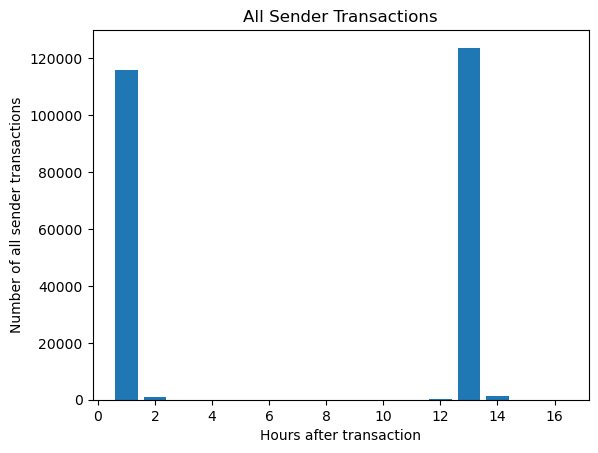

In [52]:
# Plotting distribution of sender fraud counts in hours after transaction
all_trans_btwn_counts = np.zeros(16)

for i in np.arange(16):
    all_trans_btwn_counts[i] = len(JPfraud[((JPfraud.sender_time_btwn >= dt.timedelta(hours=float(i))) &
                                    (JPfraud.sender_time_btwn < dt.timedelta(hours=float(i+1))))])

plt.figure()
plt.bar(np.linspace(1,16,16), all_trans_btwn_counts)
plt.xlabel('Hours after transaction')
plt.ylabel('Number of all sender transactions')
plt.title('All Sender Transactions')
plt.savefig('sender_hrs_after_all.png')
plt.show()


In [53]:
# Number of bene fraudulent transactions within 24 hours (inclusive) of a transaction
print('Number of bene frauds within first hour after transaction: ', JPfraud[JPfraud.bene_time_btwn <= dt.timedelta(hours=1)].Label.sum())
print('Number of bene frauds within 25 hours after transaction: ', JPfraud[JPfraud.bene_time_btwn <= dt.timedelta(hours=25)].Label.sum())
print('Number of bene frauds over 25 hours after transaction: ', JPfraud[JPfraud.bene_time_btwn > dt.timedelta(hours=25)].Label.sum())

Number of bene frauds within first hour after transaction:  2865
Number of bene frauds within 25 hours after transaction:  4956
Number of bene frauds over 25 hours after transaction:  3536


In [54]:
trans_btwn_counts

array([2.812e+03, 6.600e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       2.568e+03, 9.300e+01, 2.000e+00, 0.000e+00])

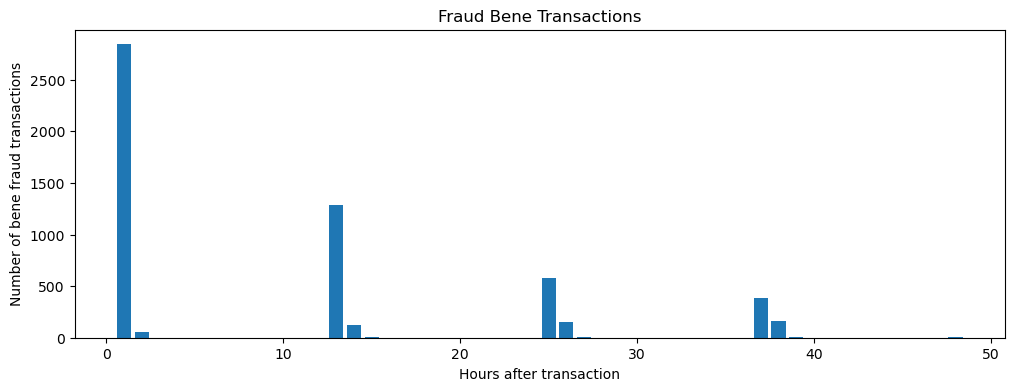

In [55]:
# Plotting distribution of bene fraud counts in hours after transaction
trans_btwn_bene_counts = np.zeros(48)

for i in np.arange(48):
    trans_btwn_bene_counts[i] = JPfraud[((JPfraud.bene_time_btwn >= dt.timedelta(hours=float(i))) &
                                    (JPfraud.bene_time_btwn < dt.timedelta(hours=float(i+1))))].Label.sum()

plt.figure(figsize=(12,4))
plt.bar(np.linspace(1,48,48), trans_btwn_bene_counts)
plt.xlabel('Hours after transaction')
plt.ylabel('Number of bene fraud transactions')
plt.title('Fraud Bene Transactions')
plt.savefig('bene_hrs_after_fraud.png')
plt.show()

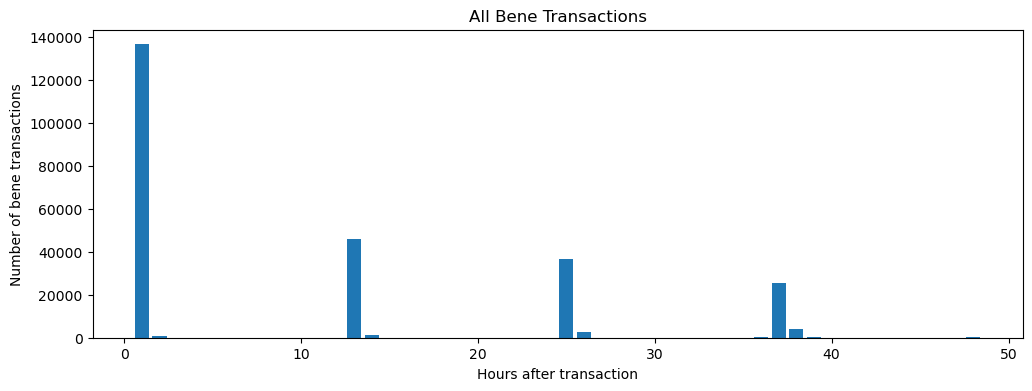

In [56]:
# Plotting distribution of bene fraud counts in hours after transaction
trans_btwn_all_bene_counts = np.zeros(48)

for i in np.arange(48):
    trans_btwn_all_bene_counts[i] = len(JPfraud[((JPfraud.bene_time_btwn >= dt.timedelta(hours=float(i))) &
                                    (JPfraud.bene_time_btwn < dt.timedelta(hours=float(i+1))))])

plt.figure(figsize=(12,4))
plt.bar(np.linspace(1,48,48), trans_btwn_all_bene_counts)
plt.xlabel('Hours after transaction')
plt.ylabel('Number of bene transactions')
plt.title('All Bene Transactions')
plt.savefig('bene_hrs_after_all.png')
plt.show()

In [57]:
trans_btwn_bene_counts

array([2.842e+03, 5.500e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       1.284e+03, 1.190e+02, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
       5.810e+02, 1.510e+02, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
       3.890e+02, 1.580e+02, 1.100e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00])

In [58]:
JPfraud.bene_time_btwn.describe()

count                       428512
mean     2 days 21:25:24.063736838
std      5 days 01:27:43.595759735
min                0 days 00:00:00
25%                0 days 00:10:00
50%                1 days 00:30:00
75%                3 days 12:50:00
max               57 days 13:00:00
Name: bene_time_btwn, dtype: object

In [59]:
# Number of fraud, bene transactions vs time between last transactions, 10-minute distribution (first 4 hours)
JPfraud[JPfraud.Label == 1].set_index('bene_time_btwn').resample('30min').Label.count().head(30)

bene_time_btwn
0 days 00:00:00    4271
0 days 00:30:00     280
0 days 01:00:00      50
0 days 01:30:00       5
0 days 02:00:00       1
0 days 02:30:00       0
0 days 03:00:00       0
0 days 03:30:00       0
0 days 04:00:00       0
0 days 04:30:00       0
0 days 05:00:00       0
0 days 05:30:00       0
0 days 06:00:00       0
0 days 06:30:00       0
0 days 07:00:00       0
0 days 07:30:00       0
0 days 08:00:00       0
0 days 08:30:00       0
0 days 09:00:00       0
0 days 09:30:00       0
0 days 10:00:00       0
0 days 10:30:00       0
0 days 11:00:00       1
0 days 11:30:00       0
0 days 12:00:00     894
0 days 12:30:00     390
0 days 13:00:00     102
0 days 13:30:00      17
0 days 14:00:00       5
0 days 14:30:00       0
Freq: 30T, Name: Label, dtype: int64

In [60]:
JPfraud[JPfraud.Label == 1].set_index('bene_time_btwn').resample('1D').Label.count()

bene_time_btwn
0 days     6018
1 days     1300
2 days      702
3 days      449
4 days      312
5 days      209
6 days      164
7 days      135
8 days      105
9 days       93
10 days      63
11 days      72
12 days      61
13 days      56
14 days      44
15 days      43
16 days      35
17 days      31
18 days      22
19 days      33
20 days      27
21 days      24
22 days      16
23 days      20
24 days      16
25 days      18
26 days      20
27 days      16
28 days      10
29 days       9
30 days       6
31 days      15
32 days      10
33 days      11
34 days       6
35 days       3
36 days       2
37 days       9
38 days       1
39 days       2
40 days       5
41 days       2
42 days       1
43 days       1
44 days       1
45 days       0
46 days       1
47 days       1
48 days       1
Freq: D, Name: Label, dtype: int64

In [61]:
JPfraud[JPfraud.Label == 0].set_index('bene_time_btwn').resample('1D').Label.count()

bene_time_btwn
0 days     250446
1 days      68439
2 days      45098
3 days      29571
4 days      22725
5 days      17585
6 days      12378
7 days       7597
8 days       4889
9 days       3759
10 days      3027
11 days      2643
12 days      2203
13 days      1928
14 days      1805
15 days      1485
16 days      1391
17 days      1282
18 days      1149
19 days      1104
20 days      1013
21 days       910
22 days       765
23 days       724
24 days       688
25 days       588
26 days       526
27 days       530
28 days       487
29 days       399
30 days       403
31 days       323
32 days       260
33 days       253
34 days       239
35 days       206
36 days       166
37 days       143
38 days       121
39 days        97
40 days       100
41 days        68
42 days        49
43 days        64
44 days        39
45 days        45
46 days        19
47 days        19
48 days        16
49 days        12
50 days         8
51 days         4
52 days         4
53 days         4
54 days      

In [62]:
timeDiffcompare = pd.concat([JPfraud[JPfraud.Label == 1].set_index('sender_time_btwn').resample('1D').Label.count(),
                             JPfraud[JPfraud.Label == 1].set_index('bene_time_btwn').resample('1D').Label.count()],
                             keys=['sender_time_btwn','bene_time_btwn'],
                             axis=1).fillna(0)
timeDiffcompare.index = timeDiffcompare.index.days
timeDiffcompare

,sender_time_btwn,bene_time_btwn
0,6903.0,6018
1,1773.0,1300
2,642.0,702
3,346.0,449
4,155.0,312
5,109.0,209
6,74.0,164
7,44.0,135
8,33.0,105
9,24.0,93


<Figure size 2000x1000 with 0 Axes>

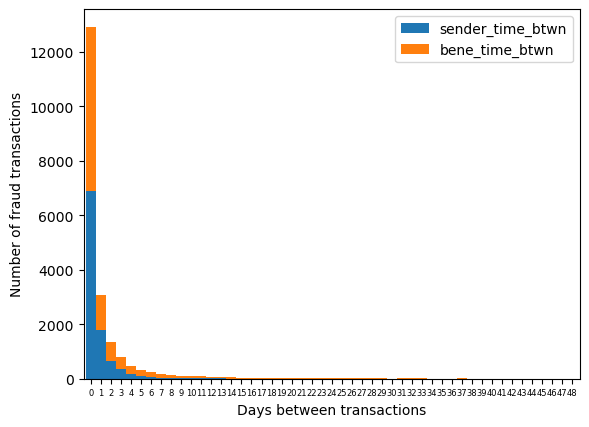

In [63]:
plt.figure(figsize=(20,10))
timeDiffcompare.plot.bar(stacked=True,width=1)
plt.xticks(fontsize=6,rotation=0)
plt.xlabel('Days between transactions')
plt.ylabel('Number of fraud transactions')
plt.show()

<font size=5> Generating time/time range features </font>

In [65]:
# Functions to convert between seconds and a time object
def convert_time_to_seconds(timeObj):
    return int((timeObj.hour)*60*60 + (timeObj.minute)*60 + (timeObj.second))

#def convert_seconds_to_time(seconds):
#    if pd.isna(seconds):
#        return pd.NA
#    
#    hour = int(seconds / 3600)
#    mins = int((seconds % 3600)/60)
#    secs = (seconds % 3600) % 60
#
#    return dt.time(hour,mins,secs)

In [66]:
np.linspace(0.75,1,26)

array([0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85,
       0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96,
       0.97, 0.98, 0.99, 1.  ])

In [67]:
pd.options.mode.chained_assignment = None
# Develop time range features:

# seconds_in_day: how many seconds after midnight the transaction is recorded for
JPfraud['seconds_in_day'] = JPfraud.Time_step.transform(lambda x: convert_time_to_seconds(x.time()))


# time_min_out: rolling 90-day quantile, i.e. at time of transaction, of lower bound on range of time for
#               regular transactions of sender (in seconds after midnight)
JPfraud['time_min_out'] = JPfraud.set_index('Time_step').groupby(
                             'Sender_Account',sort=False)['seconds_in_day'].transform(
                             lambda x: x.rolling(rolling_period,min_periods=min_obs).quantile(q=0.15)).reset_index(level=0,drop=True)

# time_max_out: rolling 90-day quantile of upper bound on range of time for regular transactions of sender
#               (in seconds after midnight)
JPfraud['time_max_out'] = JPfraud.set_index('Time_step').groupby(
                             'Sender_Account',sort=False)['seconds_in_day'].transform(
                             lambda x: x.rolling(rolling_period,min_periods=min_obs).quantile(q=0.85)).reset_index(level=0,drop=True)

# time_min_in: rolling 90-day quantile of lower bound on range of time for regular transactions of
#               beneficiary (in seconds after midnight)
JPfraud['time_min_in'] = JPfraud.set_index('Time_step').groupby(
                            'Bene_Account',sort=False)['seconds_in_day'].transform(
                            lambda x: x.rolling(rolling_period,min_periods=min_obs).quantile(q=0.15)).reset_index(level=0,drop=True)

# time_max_in: rolling 90-day quantile of upper bound on range of time for regular transactions of
#               beneficiary (in seconds after midnight)
JPfraud['time_max_in'] = JPfraud.set_index('Time_step').groupby(
                            'Bene_Account',sort=False)['seconds_in_day'].transform(
                            lambda x: x.rolling(rolling_period,min_periods=min_obs).quantile(q=0.85)).reset_index(level=0,drop=True)

# outside_time_bene_range:   indicator of whether transaction is outside range for beneficiary at
#                            time of transaction, 0 no, 1 yes
# outside_time_sender_range: indicator of whether transaction is outside usual time range for sender
#                            at time of transaction, 0 no, 1 yes
JPfraud = JPfraud.assign(outside_time_bene_range = lambda x: ((x.seconds_in_day < x.time_min_in) | (x.seconds_in_day > x.time_max_in))*1)
JPfraud = JPfraud.assign(outside_time_sender_range = lambda x: ((x.seconds_in_day < x.time_min_out) | (x.seconds_in_day > x.time_max_out))*1)

#JPfraud

In [68]:
time_features = JPfraud[['Time_step','Label','seconds_in_day','outside_time_bene_range','outside_time_sender_range']]
time_features

,Time_step,Label,seconds_in_day,outside_time_bene_range,outside_time_sender_range
0,2022-03-15 10:24:00,0,37440,0,0
1,2022-03-15 10:24:00,0,37440,0,0
2,2022-03-15 10:24:00,0,37440,0,0
3,2022-03-15 10:24:00,0,37440,0,0
4,2022-03-15 10:24:00,0,37440,0,0
...,...,...,...,...,...
499995,2032-12-06 10:55:07,0,39307,0,0
499996,2032-12-06 10:55:07,0,39307,0,0
499997,2032-12-06 11:05:07,0,39907,0,0
499998,2032-12-06 11:05:07,0,39907,0,0


In [69]:
def label_time_range(seconds):
    return int(seconds/3600) + 1

In [70]:
# transaction_hour: hour of transaction within a day
time_features['transaction_hour'] = time_features.seconds_in_day.apply(label_time_range)
time_features

,Time_step,Label,seconds_in_day,outside_time_bene_range,outside_time_sender_range,transaction_hour
0,2022-03-15 10:24:00,0,37440,0,0,11
1,2022-03-15 10:24:00,0,37440,0,0,11
2,2022-03-15 10:24:00,0,37440,0,0,11
3,2022-03-15 10:24:00,0,37440,0,0,11
4,2022-03-15 10:24:00,0,37440,0,0,11
...,...,...,...,...,...,...
499995,2032-12-06 10:55:07,0,39307,0,0,11
499996,2032-12-06 10:55:07,0,39307,0,0,11
499997,2032-12-06 11:05:07,0,39907,0,0,12
499998,2032-12-06 11:05:07,0,39907,0,0,12


In [71]:
(time_features[time_features.Label == 1].outside_time_bene_range.sum() +
time_features[time_features.Label == 1].outside_time_sender_range.sum())/len(time_features[time_features.Label == 1])

0.610626409175571

In [72]:
(time_features.outside_time_bene_range.sum() + time_features.outside_time_sender_range.sum())/len(time_features)

0.57023

In [73]:
#time_features.to_csv('data/time_features.csv')

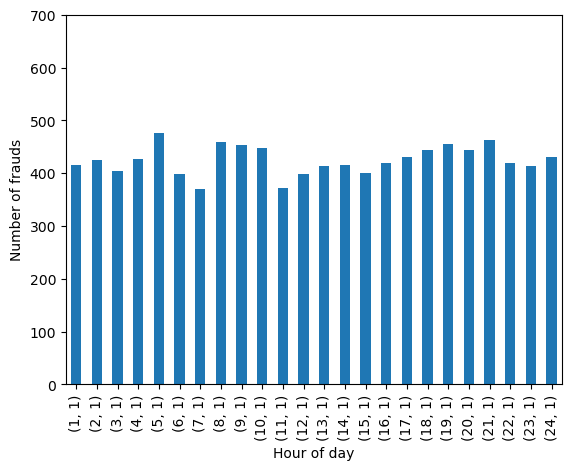

In [74]:
time_features[time_features.Label == 1].groupby('transaction_hour').Label.value_counts().plot(kind='bar')
plt.xlabel('Hour of day')
plt.ylabel('Number of frauds')
plt.ylim([0,700])
plt.show()

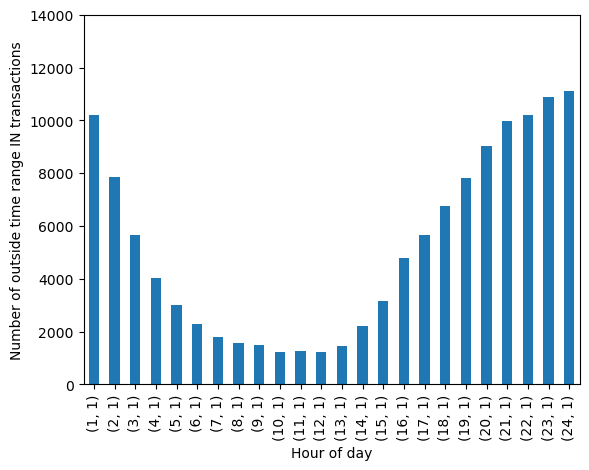

In [75]:
time_features[time_features.outside_time_bene_range == 1].groupby('transaction_hour').outside_time_bene_range.value_counts().plot(kind='bar')
plt.xlabel('Hour of day')
plt.ylabel('Number of outside time range IN transactions')
plt.ylim([0,14000])
plt.show()

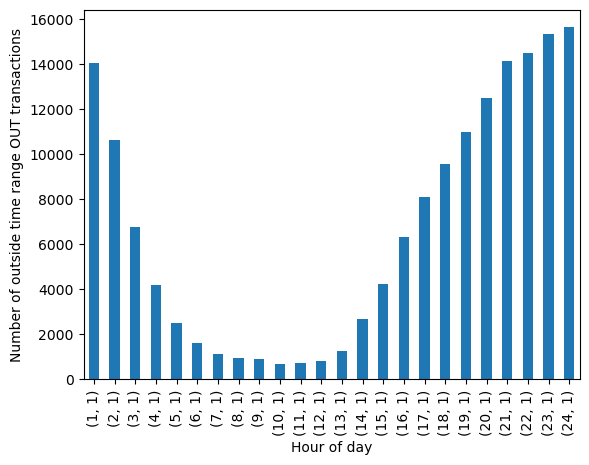

In [76]:
time_features[time_features.outside_time_sender_range == 1].groupby('transaction_hour').outside_time_sender_range.value_counts().plot(kind='bar')
plt.xlabel('Hour of day')
plt.ylabel('Number of outside time range OUT transactions')
#plt.ylim([0,14000])
plt.show()

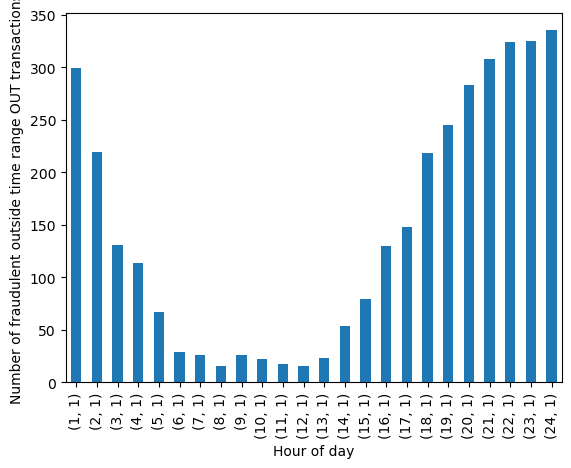

In [77]:
time_features[((time_features.outside_time_sender_range == 1) & (time_features.Label == 1))].groupby(
    'transaction_hour').outside_time_sender_range.value_counts().plot(kind='bar')
plt.xlabel('Hour of day')
plt.ylabel('Number of fraudulent outside time range OUT transactions')
#plt.ylim([0,14000])
plt.show()

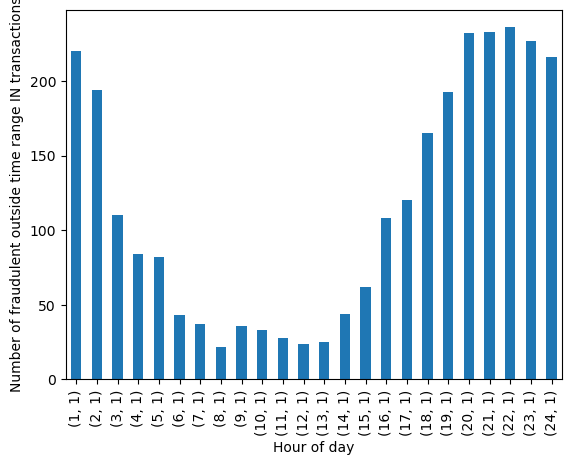

In [78]:
time_features[((time_features.outside_time_bene_range == 1) & (time_features.Label == 1))].groupby(
    'transaction_hour').outside_time_bene_range.value_counts().plot(kind='bar')
plt.xlabel('Hour of day')
plt.ylabel('Number of fraudulent outside time range IN transactions')
#plt.ylim([0,14000])
plt.show()

In [79]:
#JPfraud.loc[JPfraud.Sender_Id == sendIDs[9]].USD_amount.agg('describe')[['std','min','25%','50%','mean','75%','max']].values

In [80]:
pd.options.mode.chained_assignment = None

In [81]:
#sender_fraud_stat_amounts = JPfraud.loc[JPfraud.Label == 1].groupby(
#    'Sender_Id').USD_amount.agg('describe')[['std','min','25%','50%','mean','75%','max']].reset_index()
#sender_fraud_stat_amounts

In [82]:
JPfraud[JPfraud.Bene_Id == 'CLIENT-725719'].outside_time_bene_range.sum()

14

In [83]:
JPfraud[JPfraud.Bene_Id == 'CLIENT-725719'].Label.sum()

3

In [84]:
JPfraud[JPfraud.Sender_Account == 'ACCOUNT-9825']

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,...,rolling_bene_time_diff_max,out_sender_time_diff_range,out_bene_time_diff_range,seconds_in_day,time_min_out,time_max_out,time_min_in,time_max_in,outside_time_bene_range,outside_time_sender_range
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,...,NaN,0,0,37440,NaN,NaN,NaN,NaN,0,0
137,2022-03-15 10:54:00,PAY-BILL-9836,JPMC-CLIENT-9812,ACCOUNT-9825,USA,COMPANY-9815,ACCOUNT-9821,USA,393.89,0,...,NaN,0,0,39240,NaN,NaN,NaN,NaN,0,0
365,2022-03-16 23:24:00,CASH-CHECK-9843,JPMC-CLIENT-9812,ACCOUNT-9825,USA,NaN,NaN,NaN,207.50,0,...,NaN,1,0,84240,37980.0,70740.0,NaN,NaN,0,1
442,2022-03-17 11:34:00,QUICK-PAYMENT-9842,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,100.02,0,...,113520.0,0,1,41640,38250.0,65070.0,38700.0,71460.0,0,0
517,2022-03-17 23:34:00,WITHDRAWAL-9845,JPMC-CLIENT-9812,ACCOUNT-9825,USA,NaN,NaN,NaN,685.63,0,...,NaN,0,0,84840,38520.0,84480.0,NaN,NaN,0,1
525,2022-03-17 23:44:00,PAY-BILL-9846,JPMC-CLIENT-9812,ACCOUNT-9825,USA,COMPANY-9815,ACCOUNT-9821,USA,854.45,0,...,NaN,0,0,85440,38790.0,84990.0,NaN,NaN,0,1
753,2022-03-19 13:14:00,QUICK-PAYMENT-9865,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,930.23,0,...,159000.0,1,0,47640,39060.0,84900.0,39960.0,62280.0,0,0
755,2022-03-19 13:24:00,EXCHANGE-9866,JPMC-CLIENT-9812,ACCOUNT-9825,USA,NaN,NaN,NaN,100.26,0,...,NaN,0,0,48240,39360.0,84810.0,NaN,NaN,0,0
759,2022-03-19 13:54:00,MOVE-FUNDS-9869,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-COMPANY-9819,ACCOUNT-9830,LIBERIA,232.31,0,...,NaN,0,0,50040,39720.0,84720.0,NaN,NaN,0,0
760,2022-03-19 14:04:00,EXCHANGE-9870,JPMC-CLIENT-9812,ACCOUNT-9825,USA,NaN,NaN,NaN,204.88,0,...,NaN,0,0,50640,40080.0,84630.0,NaN,NaN,0,0


<font size=5> Adding Abdullah's features to test run a logistic model on training data</font>

In [86]:
JPfraud_fit = JPfraud[:465008].loc[JPfraud.USD_amount > 0].reset_index(drop=True)
JPfraud_fit

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,...,rolling_bene_time_diff_max,out_sender_time_diff_range,out_bene_time_diff_range,seconds_in_day,time_min_out,time_max_out,time_min_in,time_max_in,outside_time_bene_range,outside_time_sender_range
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,NaN,NaN,NaN,558.43,0,...,NaN,0,0,37440,NaN,NaN,NaN,NaN,0,0
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,...,NaN,0,0,37440,NaN,NaN,NaN,NaN,0,0
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,...,NaN,0,0,37440,NaN,NaN,NaN,NaN,0,0
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,...,NaN,0,0,37440,NaN,NaN,NaN,NaN,0,0
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,...,NaN,0,0,37440,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464995,2032-03-15 03:25:03,CASH-CHECK-681865,JPMC-CLIENT-681783,ACCOUNT-681793,USA,NaN,NaN,NaN,293.02,0,...,NaN,0,0,12303,3363.0,49773.0,NaN,NaN,0,0
464996,2032-03-15 03:35:03,QUICK-PAYMENT-683993,JPMC-CLIENT-683912,ACCOUNT-683922,USA,JPMC-CLIENT-683910,ACCOUNT-683924,USA,944.70,0,...,167160.0,0,0,12903,9453.0,22503.0,8463.0,52743.0,0,0
464997,2032-03-15 03:35:03,CASH-CHECK-682411,JPMC-CLIENT-682328,ACCOUNT-682339,USA,NaN,NaN,NaN,646.68,0,...,NaN,1,0,12903,7803.0,49053.0,NaN,NaN,0,0
464998,2032-03-15 03:35:03,MAKE-PAYMENT-681864,JPMC-CLIENT-681783,ACCOUNT-681794,USA,BILL-COMPANY-681847,ACCOUNT-681848,USA,113.96,0,...,NaN,0,0,12903,10203.0,53103.0,NaN,NaN,0,0


In [87]:
# columns to drop for model fitting
columns_to_drop = ['seconds_in_day','time_min_in','time_max_in','time_min_out','time_max_out',
                   'rolling_sender_trans_min','rolling_sender_trans_max','rolling_bene_trans_min',
                   'rolling_bene_trans_max','rolling_sender_time_diff_min','rolling_sender_time_diff_max',
                   'rolling_bene_time_diff_min','rolling_bene_time_diff_max','sender_time_btwn','bene_time_btwn',
                   'Time_step','Transaction_Id','Sender_Id','Sender_Account','Sender_Country','Bene_Id',
                   'USD_amount','Bene_Account','Bene_Country','Transaction_Type']

In [88]:
JPfraud_fit = JPfraud_fit.drop(labels=columns_to_drop,axis=1)
JPfraud_fit

,Label,out_sender_trans_range,out_bene_trans_range,out_sender_time_diff_range,out_bene_time_diff_range,outside_time_bene_range,outside_time_sender_range
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
464995,0,0,0,0,0,0,0
464996,0,0,0,0,0,0,0
464997,0,0,0,1,0,0,0
464998,0,0,0,0,0,0,0


In [89]:
more_features = pd.read_csv('../data/Total_engineered_features')
more_features

,New,Repeat_Fraud,bene_prob,Fraud_percentage_bene,Fraud_index_bene,sender_prob,Fraud_percentage_sender,Fraud_index_sender,Quick,Transaction_Type_DEPOSIT-CASH,Transaction_Type_DEPOSIT-CHECK,Transaction_Type_EXCHANGE,Transaction_Type_MAKE-PAYMENT,Transaction_Type_MOVE-FUNDS,Transaction_Type_PAY-CHECK,Transaction_Type_QUICK-PAYMENT,Transaction_Type_WITHDRAWAL
0,1,0,0.000000,0.0000,0.000000e+00,0.000000,0.0,0.000000e+00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0.000000,0.0000,0.000000e+00,0.000000,0.0,0.000000e+00,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.000000,0.0000,0.000000e+00,0.000000,0.0,1.000000e-08,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0.000000,0.0000,0.000000e+00,0.000000,0.0,0.000000e+00,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0.000000,0.0000,0.000000e+00,0.624825,0.0,1.000000e-08,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464995,0,0,0.433338,0.0213,1.000000e+00,0.458901,0.0,5.000000e-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
464996,0,0,0.669394,0.0000,5.000000e-01,0.729435,0.0,3.333333e-01,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
464997,0,0,0.714507,0.0213,1.000000e+00,0.680761,0.0,5.000000e-01,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
464998,0,0,0.993585,0.0000,1.000000e-08,0.270586,0.0,5.000000e-01,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [90]:
more_features = more_features.drop(columns=['Quick'])

In [91]:
JPfraud_fit = pd.concat([JPfraud_fit,more_features],axis=1)
JPfraud_fit

,Label,out_sender_trans_range,out_bene_trans_range,out_sender_time_diff_range,out_bene_time_diff_range,outside_time_bene_range,outside_time_sender_range,New,Repeat_Fraud,bene_prob,...,Fraud_percentage_sender,Fraud_index_sender,Transaction_Type_DEPOSIT-CASH,Transaction_Type_DEPOSIT-CHECK,Transaction_Type_EXCHANGE,Transaction_Type_MAKE-PAYMENT,Transaction_Type_MOVE-FUNDS,Transaction_Type_PAY-CHECK,Transaction_Type_QUICK-PAYMENT,Transaction_Type_WITHDRAWAL
0,0,0,0,0,0,0,0,1,0,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,1,0,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,1,0,0.000000,...,0.0,1.000000e-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,1,0,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0,0,0,1,0,0.000000,...,0.0,1.000000e-08,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464995,0,0,0,0,0,0,0,0,0,0.433338,...,0.0,5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
464996,0,0,0,0,0,0,0,0,0,0.669394,...,0.0,3.333333e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
464997,0,0,0,1,0,0,0,0,0,0.714507,...,0.0,5.000000e-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
464998,0,0,0,0,0,0,0,0,0,0.993585,...,0.0,5.000000e-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [92]:
JPfraud_fit.columns

Index(['Label', 'out_sender_trans_range', 'out_bene_trans_range',
       'out_sender_time_diff_range', 'out_bene_time_diff_range',
       'outside_time_bene_range', 'outside_time_sender_range', 'New',
       'Repeat_Fraud', 'bene_prob', 'Fraud_percentage_bene',
       'Fraud_index_bene', 'sender_prob', 'Fraud_percentage_sender',
       'Fraud_index_sender', 'Transaction_Type_DEPOSIT-CASH',
       'Transaction_Type_DEPOSIT-CHECK', 'Transaction_Type_EXCHANGE',
       'Transaction_Type_MAKE-PAYMENT', 'Transaction_Type_MOVE-FUNDS',
       'Transaction_Type_PAY-CHECK', 'Transaction_Type_QUICK-PAYMENT',
       'Transaction_Type_WITHDRAWAL'],
      dtype='object')

In [93]:
num_features = ['bene_prob','Fraud_percentage_bene','Fraud_index_bene','sender_prob',
                'Fraud_percentage_sender','Fraud_index_sender']
cat_features = ['out_sender_trans_range','out_bene_trans_range','out_sender_time_diff_range',
                'out_bene_time_diff_range','outside_time_bene_range','outside_time_sender_range','New',
                'Repeat_Fraud','Quick','Transaction_Type_DEPOSIT-CASH','Transaction_Type_DEPOSIT-CHECK',
                'Transaction_Type_EXCHANGE','Transaction_Type_MAKE-PAYMENT', 'Transaction_Type_MOVE-FUNDS',
                'Transaction_Type_PAY-CHECK','Transaction_Type_QUICK-PAYMENT','Transaction_Type_WITHDRAWAL']

In [94]:
print(len(JPfraud_fit.columns))
print(len(num_features))
print(len(cat_features))

23
6
17


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, classification_report, accuracy_score, log_loss,average_precision_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(JPfraud_fit.drop(columns=['Label'],axis=1),JPfraud_fit.Label,test_size=0.2,random_state=12345)

In [97]:
log_reg = LogisticRegression()
#y = JPfraud_fit.Label

log_reg.fit(X_train,y_train)
Label_preds = log_reg.predict(X_test)

print('Coeffs: ',log_reg.coef_)
print('Intercept: ', log_reg.intercept_)
print('Score: ', log_reg.score(JPfraud_fit.drop(labels=['Label'],axis=1),y))
print(classification_report(y_test, Label_preds))

Coeffs:  [[-0.18021836  0.1335468  -0.30034715 -0.09591412  0.04527182  0.07949238
   0.66601434  0.2010262  -0.73797946  0.89214193  0.78182966  1.44721441
   2.57947213  2.29912672 -0.37651298 -0.97035953  0.10556103 -0.08260785
   0.14712501  0.35887633  0.67570634  0.14230137]]
Intercept:  [-6.8028669]


NameError: name 'y' is not defined

In [ ]:
confusion_matrix(y_test,Label_preds, normalize='true').round(3)

In [ ]:
cm = confusion_matrix(y_test, Label_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix')
plt.show()

In [ ]:
110/(9406+110)